## Multipath propagation and Rayleigh Fading
[Video Lecture.](https://www.youtube.com/watch?v=sNoBuFUfmGQ&list=PLTv48TzNRhaKb_D7SF3d1eNoqjrTJg34C&index=3)

We consider the scenario when the line-of-sight (LoS) path between the
transmitter and the receiver is blocked. In those cases, there are still
other propagation paths to model. There is the phenomena of scattering
where a signal from transmitter reaches an object, and then it is spreading
out towards the receiver. There are often many such objects in the same
environment, each of them will have a propagation path that is slightly
different. The received signal will be the combination from $L$ paths.
Channel with $L$ propagation paths:
$$g=\sum_{i=1}^{L}{\sqrt{\alpha_i}e^{-j2\pi\frac{d_i-d}{\lambda}}}$$

Where $\alpha_i$ is the channel gain of the $i$ path, $\lambda$ is the
wavelength, $d_i, d$ is the distance of the i-path and reference
distance, respectively,  $-j2\pi\frac{d_i-d}{\lambda}$ describes
the time delay or phase shift.

Let's consider the following example:
- $\alpha_i=\frac{1}{L}$
- $\theta_i=2\pi\frac{d_i-d}{\lambda}\sim U(0,2\pi)$
- Channel magnitude:
$|g|=\left|\sum_{i=1}^{L}{\sqrt{\frac{1}{L}}e^{-j\theta_i}}\right|$

(0, 1)

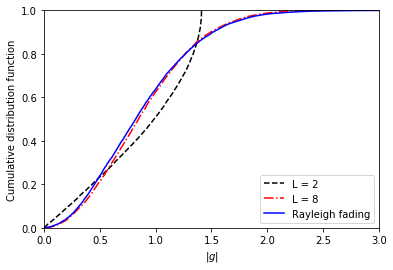

In [34]:
from numpy import pi, exp, sqrt, abs
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

samples = 10000
l_values = [2, 8]
g_all = np.zeros((len(l_values), samples))
rayleigh = abs(normal(loc=0, scale=sqrt(2)/2, size=(samples, 2)).view(np.complex128) )
for j in range(samples):
    for l_index, l_value in enumerate(l_values):
        g = 0
        for i in range(l_value):
            g = g + sqrt(1/l_value)*exp(-1j*np.random.uniform(0,2*pi))
        g_all[l_index,j] = abs(g)
values, base = np.histogram(g_all[0,:], bins=500)
values2, base2 = np.histogram(g_all[1,:], bins=500)
values3, base3 = np.histogram(rayleigh, bins=500)
#evaluate the cumulative
cumulative = np.cumsum(values)/samples
cumulative2 = np.cumsum(values2)/samples
cumulative3 = np.cumsum(values3)/samples
# plot the cumulative function
plt.plot(base[:-1], cumulative, 'k--',
         base2[:-1], cumulative2, 'r-.',
         base3[:-1], cumulative3, 'b')
plt.legend(['L = 2', 'L = 8', 'Rayleigh fading'], loc='lower right')
plt.xlabel(r'$|g|$')
plt.ylabel('Cumulative distribution function')
plt.xlim([0,3])
plt.ylim([0,1])

In [33]:
print(rayleigh)


[[0.3851098 ]
 [0.43836629]
 [0.2987118 ]
 ...
 [1.00748692]
 [0.70741126]
 [1.54633994]]
